In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import math
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("roshea6/finger-digits-05")

print("Path to dataset files:", path)

100%|██████████| 19.0M/19.0M [00:00<00:00, 103MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/roshea6/finger-digits-05/versions/1


In [3]:
# Get kaggle data
os.chdir(path + '/training_images (copy)')
os.listdir()[0:5]

['751_3.png', '1271_0.png', '428_0.png', '319_5.png', '25_2.png']

In [4]:
image_paths = [f for f in os.listdir() if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

images=[]
for image_file in image_paths:
    with Image.open(image_file) as image:
        images.append(np.array(image))

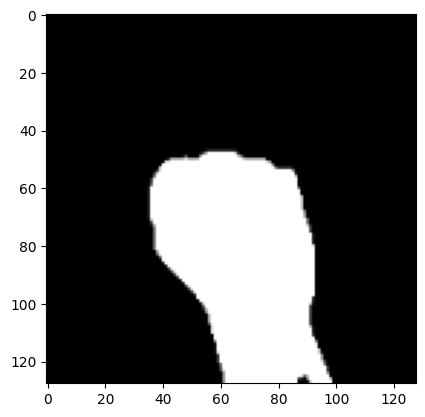

In [5]:
plt.imshow(images[10],cmap='gray')

In [6]:
# Get data
X=np.array(images)
X = X.reshape(-1, 128, 128, 1)
Y=[int(image_paths[i].split('_')[1].split('.')[0]) for i in range(len(X))]
Y=np.array(Y)

# Inspect the data
print(X.shape)
print(Y.shape)

(12006, 128, 128, 1)
(12006,)


In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=404)

# Inspect the data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9604, 128, 128, 1)
(9604,)
(2402, 128, 128, 1)
(2402,)


In [8]:
# Normalizing the data to be values in between 0 and 1
X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
# # 1. Create CNN model object
cnn_model = keras.Sequential()

# # 2. Create the input layer and add it to the model object:
# input_layer = keras.layers.InputLayer(input_shape=X_train[0].shape)
# cnn_model.add(input_layer)

# # 3a. Create the first convolutional layer and add it to the model object:
conv_1 = keras.layers.Conv2D(input_shape=X_train[0].shape, filters=10, kernel_size=(3, 3))
# batchNorm_1 = keras.layers.BatchNormalization()
ReLU_1 = keras.layers.ReLU()
cnn_model.add(conv_1)
# cnn_model.add(batchNorm_1)
cnn_model.add(ReLU_1)

# # 3b. Create the pooling layer and add it to the model object:
pooling_layer_1 = keras.layers.MaxPooling2D(pool_size=(2,2))
cnn_model.add(pooling_layer_1)


# # 4. Create the second convolutional layer and add it to the model object:
conv_2 = keras.layers.Conv2D(filters=10, kernel_size=(3,3))
# batchNorm_2 = keras.layers.BatchNormalization()
ReLU_2 = keras.layers.ReLU()
cnn_model.add(conv_2)
# cnn_model.add(batchNorm_2)
cnn_model.add(ReLU_2)

# # 4b. Create the pooling layer and add it to the model object:
pooling_layer_2 = keras.layers.MaxPooling2D(pool_size=(2,2))
cnn_model.add(pooling_layer_2)

# # 5. Create the third convolutional layer and add it to the model object:
# conv_3 = keras.layers.Conv2D(filters=64, kernel_size=3)
# batchNorm_3 = keras.layers.BatchNormalization()
# ReLU_3 = keras.layers.ReLU()
# cnn_model.add(conv_3)
# cnn_model.add(batchNorm_3)
# cnn_model.add(ReLU_3)


# # 6. Create the fourth convolutional layer and add it to the model object:
# conv_4 = keras.layers.Conv2D(filters=128, kernel_size=3)
# batchNorm_4 = keras.layers.BatchNormalization()
# ReLU_4 = keras.layers.ReLU()
# cnn_model.add(conv_4)
# cnn_model.add(batchNorm_4)
# cnn_model.add(ReLU_4)


# # 7. Create the pooling layer and add it to the model object:
# pooling_layer = keras.layers.GlobalAveragePooling2D()
# cnn_model.add(pooling_layer)

flatten_layer = keras.layers.Flatten()
cnn_model.add(flatten_layer)

# # 8. Create the output layer and add it to the model object:
dense_layer = keras.layers.Dense(units=128, activation='relu')
cnn_model.add(dense_layer)

output_layer = keras.layers.Dense(units=6, activation='softmax')
cnn_model.add(output_layer)

cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 10)        │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 126, 126, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 61, 61, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,152,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,153,912 (4.40 MB)

 Trainable params: 1,153,912 (4.40 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_model.fit(X,Y,batch_size=32,epochs=2,validation_data=(X_test,y_test))

Epoch 1/2
376/376 ━━━━━━━━━━━━━━━━━━━━ 100s 262ms/step - accuracy: 0.8916 - loss: 7.8901 - val_accuracy: 0.9983 - val_loss: 1.7140
Epoch 2/2
376/376 ━━━━━━━━━━━━━━━━━━━━ 99s 262ms/step - accuracy: 1.0000 - loss: 4.5220e-04 - val_accuracy: 1.0000 - val_loss: 1.7089


In [11]:
# Save the model:
os.chdir('/content/sample_data')
cnn_model.save('handNums_model.h5')

print(os.getcwd())

/content/sample_data
